1. What is the probability of observing a value five sigma greater than the mean or more?

In [1]:
using Distributions
d = Normal()
(1-cdf(d, mean(d) + 5*1))

2.866515719235352e-7

2. A fever is any temperature greater than 100.4 degrees Fahrenheit. Given the following measurements, what is the probability that the patient has a fever?

100.0, 99.8, 101.0, 100.5, 99.7

In [2]:
function my_sigma(nums::Array)
    mu = mean(nums)
    sq_sum = 0
    for n in nums
        sq_sum += (n - mu) ^ 2
    end
    v = sq_sum / length(nums) 
    sigma = sqrt(v)
end
temp = [100.0, 99.8, 101.0, 100.5, 99.7]
mu = mean(temp)
sigma = my_sigma(temp)
1 - cdf(Normal(mu, sigma), 100.4)

0.3402820504876537

3. Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values:

2.5, 3, 3.5, 4, 2

The distance an object falls can be calculated (in meters) with the following formula:

distance = 1/2 × G × time2

where G is 9.8 m/s/s. What is the probability that the well is over 500 meters deep?

In [7]:
function dis(t::Float64)
    d = 1/2 * 9.8 * t^2
end

t = [2.5, 3, 3.5, 4, 2]
d = dis.(t)

mu = mean(d)
sigma = my_sigma(d)
1 - cdf(Normal(mu, sigma), 500)

0.0

# Disagree with the solution
4. What is the probability there is no well (i.e., the well is really 0 meters deep)? You’ll notice that probability is higher than you might expect, given your observation that there is a well. There are two good explanations for this probability being higher than it should. The first is that the normal distribution is a poor model for our measurements; the second is that, when making up numbers for an example, I chose values that you likely wouldn’t see in real life. Which is more likely to you?

In [4]:
cdf(Normal(mu, sigma), 0)

0.012928081087338415

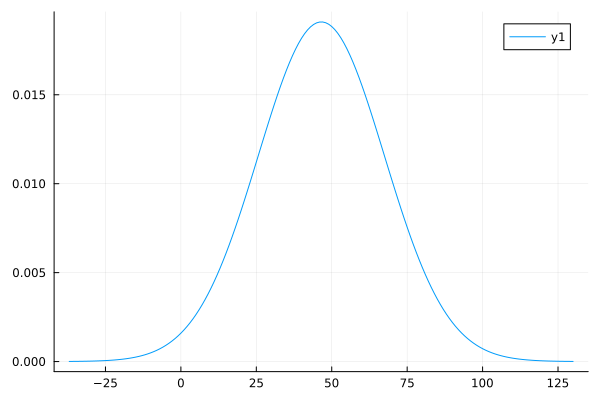

In [5]:
using Plots
low = mu - 4*sigma
high = mu + 4*sigma
x = collect(low:1:high)
y = pdf.(Normal(mu, sigma), x)
plot(x,y)


First